In [3]:
%run IDM_helper_functions.ipynb

In [4]:
from pyddm import Model
from pyddm.models import DriftConstant, DriftLinear, NoiseConstant, BoundConstant, OverlayNonDecision, ICPointSourceCenter
from pyddm.functions import fit_adjust_model, display_model

from pyddm import Fittable, Fitted, Sample
from pyddm.models import LossRobustBIC, LossBIC, LossLikelihood, LossRobustLikelihood,LossSquaredError
from pyddm.functions import fit_adjust_model

In [5]:
import pandas as pd
import os
import pyreadr
import seaborn as sns
import scipy

In [11]:
data_dir = "/Users/wangjiashun/Desktop/Evans2021/Dutilh2013/dataBySubject/sub"
sample_size = 32

In [21]:
df

,Time,Correct,Stim,Cond
0,0.6433,True,Stim1,accuracy
1,0.6524,True,Stim1,accuracy
2,0.6480,True,Stim2,accuracy
3,0.6839,False,Stim2,accuracy
4,0.8687,False,Stim2,accuracy
...,...,...,...,...
1477,0.5820,True,Stim1,accuracy
1478,0.8664,True,Stim1,accuracy
1479,0.9743,True,Stim1,accuracy
1480,0.5926,True,Stim1,accuracy


In [19]:
path = os.path.join(data_dir+str(i+1)+".csv")
df = pd.read_csv(path, sep = ",")


In [42]:
par_fitted_A = np.zeros((sample_size,4))
for i in range(sample_size):
    print(i)
    
    path = os.path.join(data_dir+str(i+1)+".csv")
    df = pd.read_csv(path, sep = ",")
    df = df[df["Cond"]=="speed"] # A condition
    df = df[df["Time"]<4]
    
    samp = Sample.from_pandas_dataframe(df, rt_column_name="Time", correct_column_name="Correct")

    model_fit = Model(name='Simple model (fitted)',
                  drift=DriftLinear(drift=Fittable(minval=0, maxval=6),
                                    t = 0,
                                    x=Fittable(minval=-20, maxval=20)),
                  noise=NoiseConstant(noise=1),
                  bound=BoundConstant(B=Fittable(minval=0.5, maxval=10)),
                  overlay=OverlayNonDecision(nondectime=Fittable(minval=0.1, maxval=1)),
                  dx=.001, dt=.001, T_dur=4)
                  #dx=.001, dt=.001, T_dur=3)

    fit_adjust_model(samp, model_fit,
                     fitting_method="differential_evolution",
                     lossfunction=LossRobustBIC, verbose=False)

    par_fitted_A[i,0] = np.array(model_fit.parameters()['drift']['drift'])
    par_fitted_A[i,1] = np.array(model_fit.parameters()['bound']['B'])
    par_fitted_A[i,2] = np.array(model_fit.parameters()['overlay']['nondectime'])
    par_fitted_A[i,3] = np.array(model_fit.parameters()['drift']['x'])
    
    print(par_fitted_A[i,:])


0


Info: Params [0.15791379 9.10549926 4.50825752 0.1008066 ] gave -336.41812164106597


[0.15791379 4.50825752 0.1008066  9.10549926]
1


Info: Params [2.03318423 3.44214048 0.68376101 0.33339001] gave -204.04938728690712


[2.03318423 0.68376101 0.33339001 3.44214048]
2


Info: Params [0.         2.25866367 1.37815704 0.10213174] gave 347.33868046572576


[0.         1.37815704 0.10213174 2.25866367]
3


Info: Params [3.68583599 3.10939084 0.91223631 0.30743599] gave -148.223794247723


[3.68583599 0.91223631 0.30743599 3.10939084]
4


Info: Params [1.95318633 3.90179147 1.30323032 0.18667298] gave -72.54492500056958


[1.95318633 1.30323032 0.18667298 3.90179147]
5


Info: Params [1.27119366 7.23752765 1.90403051 0.18386342] gave -171.0024649330095


[1.27119366 1.90403051 0.18386342 7.23752765]
6


Info: Params [1.17275323 6.86738003 1.23867661 0.17755556] gave -273.00127205934496


[1.17275323 1.23867661 0.17755556 6.86738003]
7


Info: Params [1.22457753 5.502223   2.13249841 0.10068294] gave -15.40029457168714


[1.22457753 2.13249841 0.10068294 5.502223  ]
8


Info: Params [0.74692793 4.76224556 2.14000764 0.10005155] gave 112.73297066659137


[0.74692793 2.14000764 0.10005155 4.76224556]
9


Info: Params [0.01285694 7.1363672  1.2214412  0.10022575] gave 43.28632341290282


[0.01285694 1.2214412  0.10022575 7.1363672 ]
10


Info: Params [2.58251582 5.53878551 6.22687347 0.10455031] gave -56.68517337162204


[2.58251582 6.22687347 0.10455031 5.53878551]
11


Info: Params [2.22187222 6.52689498 0.84082149 0.29637885] gave -463.35436324364224


[2.22187222 0.84082149 0.29637885 6.52689498]
12


Info: Params [3.70173118 5.41206676 1.27016361 0.25634744] gave -436.95881184694497


[3.70173118 1.27016361 0.25634744 5.41206676]
13


Info: Params [1.45822081 5.40394829 0.76702324 0.22260492] gave -229.92934831808626


[1.45822081 0.76702324 0.22260492 5.40394829]
14


Info: Params [0.31690461 7.94651225 5.13691191 0.10032678] gave -39.18182462500693


[0.31690461 5.13691191 0.10032678 7.94651225]
15


Info: Params [2.71119843 5.86680177 0.9323384  0.30778585] gave -261.6919000352991


[2.71119843 0.9323384  0.30778585 5.86680177]
16


Info: Params [0.46498389 5.53985106 1.28060186 0.10079121] gave 311.75949932005125


[0.46498389 1.28060186 0.10079121 5.53985106]
17


Info: Params [2.65666246 7.17561527 1.03488074 0.23681733] gave -639.5866757969549


[2.65666246 1.03488074 0.23681733 7.17561527]
18


Info: Params [1.60737701 5.3704385  0.71485362 0.25292582] gave -152.2879847908558


[1.60737701 0.71485362 0.25292582 5.3704385 ]
19


Info: Params [1.27769995 8.60669496 2.93794616 0.10633285] gave -500.8992843057202


[1.27769995 2.93794616 0.10633285 8.60669496]
20


Info: Params [ 0.28407058 10.91905342  2.70438976  0.10611026] gave -322.14962523650337


[ 0.28407058  2.70438976  0.10611026 10.91905342]
21


Info: Params [0.30408612 6.94748122 1.83986221 0.10085433] gave 68.98884483795095


[0.30408612 1.83986221 0.10085433 6.94748122]
22


Info: Params [2.68169777 8.83720663 5.42980095 0.1256885 ] gave -189.86766168139735


[2.68169777 5.42980095 0.1256885  8.83720663]
23


Info: Params [ 1.25437476 14.22052887  5.78403042  0.10004136] gave -828.1838368965695


[ 1.25437476  5.78403042  0.10004136 14.22052887]
24


Info: Params [ 1.86974719 10.49870452  2.37082015  0.17995218] gave -629.1005245825155


[ 1.86974719  2.37082015  0.17995218 10.49870452]
25


Info: Params [0.63062518 8.28058276 1.72881692 0.10044919] gave -306.0210893526522


[0.63062518 1.72881692 0.10044919 8.28058276]
26


Info: Params [6.         1.21642869 2.81916413 0.10611304] gave -193.67385094358366


[6.         2.81916413 0.10611304 1.21642869]
27


Info: Params [2.31656771 8.44573069 0.85278245 0.23615581] gave -500.04935603100637


[2.31656771 0.85278245 0.23615581 8.44573069]
28


Info: Params [ 2.15557868 13.10017443  7.68556066  0.11277821] gave -501.08850928234045


[ 2.15557868  7.68556066  0.11277821 13.10017443]
29


Info: Params [2.97230878 4.35049649 0.69984132 0.30113165] gave -443.9121040330863


[2.97230878 0.69984132 0.30113165 4.35049649]
30


Info: Params [1.41128511 7.21974525 2.04637606 0.14562699] gave -120.5402756370293


[1.41128511 2.04637606 0.14562699 7.21974525]
31


Info: Params [ 1.53953558 10.95138801  1.86547396  0.18614564] gave -733.9789262373596


[ 1.53953558  1.86547396  0.18614564 10.95138801]


In [43]:
par_fitted_B = np.zeros((sample_size,4))
for i in range(sample_size):
    print(i)
    
    path = os.path.join(data_dir+str(i+1)+".csv")
    df = pd.read_csv(path, sep = ",")
    df = df[df["Cond"]=="accuracy"] # A condition
    df = df[df["Time"]<4]
    
    samp = Sample.from_pandas_dataframe(df, rt_column_name="Time", correct_column_name="Correct")
    
    model_fit = Model(name='Simple model (fitted)',
                  drift=DriftLinear(drift=Fittable(minval=0, maxval=6),
                                    t = 0,
                                    x=Fittable(minval=-20, maxval=20)),
                  noise=NoiseConstant(noise=1),
                  bound=BoundConstant(B=Fittable(minval=0.5, maxval=10)),
                  overlay=OverlayNonDecision(nondectime=Fittable(minval=0.1, maxval=1)),
                  dx=.001, dt=.001, T_dur=4)
                  #dx=.001, dt=.001, T_dur=3)

    fit_adjust_model(samp, model_fit,
                     fitting_method="differential_evolution",
                     lossfunction=LossRobustBIC, verbose=False)

    par_fitted_B[i,0] = np.array(model_fit.parameters()['drift']['drift'])
    par_fitted_B[i,1] = np.array(model_fit.parameters()['bound']['B'])
    par_fitted_B[i,2] = np.array(model_fit.parameters()['overlay']['nondectime'])
    par_fitted_B[i,3] = np.array(model_fit.parameters()['drift']['x'])
    
    print(par_fitted_B[i,:])


0


Info: Params [0.8567832  4.82205198 1.76462216 0.23747286] gave 290.2893489262593


[0.8567832  1.76462216 0.23747286 4.82205198]
1


Info: Params [1.66588624 5.1966804  1.31372542 0.31016382] gave 4.283995566990129


[1.66588624 1.31372542 0.31016382 5.1966804 ]
2


Info: Params [0.         3.7832373  8.31450846 0.12378029] gave 220.78457576756765


[0.         8.31450846 0.12378029 3.7832373 ]
3


Info: Params [6.         2.17602752 3.68870277 0.12075847] gave -53.61003394611594


[6.         3.68870277 0.12075847 2.17602752]
4


Info: Params [2.20630883 2.28052417 1.01952213 0.28366703] gave -7.10029358533269


[2.20630883 1.01952213 0.28366703 2.28052417]
5


Info: Params [1.76679622 4.41974101 3.82716969 0.10126418] gave -15.856189783043288


[1.76679622 3.82716969 0.10126418 4.41974101]
6


Info: Params [3.98044166 4.45184427 2.9089645  0.23662128] gave -157.24265873486783


[3.98044166 2.9089645  0.23662128 4.45184427]
7


Info: Params [2.14657558 2.25977142 0.86857408 0.26228977] gave -109.37321511968887


[2.14657558 0.86857408 0.26228977 2.25977142]
8


Info: Params [1.41598656 4.78007515 1.40864684 0.25135537] gave -2.5810838075988514


[1.41598656 1.40864684 0.25135537 4.78007515]
9


Info: Params [0.27351014 3.96243534 1.93750485 0.11077553] gave 222.04471161375116


[0.27351014 1.93750485 0.11077553 3.96243534]
10


Info: Params [3.66326184 4.17249273 3.18371868 0.23127464] gave -27.48121823078234


[3.66326184 3.18371868 0.23127464 4.17249273]
11


Info: Params [2.75556766 3.2677954  1.04428959 0.29566871] gave -201.07420921248877


[2.75556766 1.04428959 0.29566871 3.2677954 ]
12


Info: Params [2.68908815 8.30584688 1.41834585 0.26781732] gave -203.27774519317677


[2.68908815 1.41834585 0.26781732 8.30584688]
13


Info: Params [3.14328833 3.04443093 1.19205318 0.26473255] gave -170.78397422915364


[3.14328833 1.19205318 0.26473255 3.04443093]
14


Info: Params [0.06748236 4.46456382 3.12899439 0.10520285] gave 430.231167362033


[0.06748236 3.12899439 0.10520285 4.46456382]
15


Info: Params [6.         3.98687259 5.73280873 0.10355899] gave -215.5513944714149


[6.         5.73280873 0.10355899 3.98687259]
16


Info: Params [1.76230814 2.43729312 1.325572   0.1886433 ] gave 22.78893970896136


[1.76230814 1.325572   0.1886433  2.43729312]
17


Info: Params [3.50514595 5.15224711 1.28547165 0.22687979] gave -353.76481156742886


[3.50514595 1.28547165 0.22687979 5.15224711]
18


Info: Params [2.64753073 5.11341366 0.961922   0.2576265 ] gave -181.28938037225825


[2.64753073 0.961922   0.2576265  5.11341366]
19


Info: Params [2.98341116 4.67172512 1.0850627  0.25269566] gave -384.92024669714937


[2.98341116 1.0850627  0.25269566 4.67172512]
20


Info: Params [2.26094524 5.292123   1.98069163 0.18776387] gave -91.2029262261618


[2.26094524 1.98069163 0.18776387 5.292123  ]
21


Info: Params [1.23166307 5.476876   1.5977195  0.24434186] gave 11.537612842963128


[1.23166307 1.5977195  0.24434186 5.476876  ]
22


Info: Params [6.         5.19598884 4.33773304 0.20430944] gave -55.51279198176272


[6.         4.33773304 0.20430944 5.19598884]
23


Info: Params [3.1922535  5.96255318 0.58798612 0.29792884] gave -328.8473140403445


[3.1922535  0.58798612 0.29792884 5.96255318]
24


Info: Params [3.6760307  3.41658639 0.72756114 0.31532715] gave -252.02567393824475


[3.6760307  0.72756114 0.31532715 3.41658639]
25


Info: Params [2.83224409 3.13662382 0.76333852 0.28511647] gave -256.7233644131558


[2.83224409 0.76333852 0.28511647 3.13662382]
26


Info: Params [2.63809232 5.40792187 1.7564337  0.21796932] gave -50.03688441858939


[2.63809232 1.7564337  0.21796932 5.40792187]
27


Info: Params [3.62310381 6.88799494 0.81404378 0.27061443] gave -439.64823819920656


[3.62310381 0.81404378 0.27061443 6.88799494]
28


Info: Params [3.26951314 4.94354883 0.52170327 0.3069277 ] gave -458.0113688338559


[3.26951314 0.52170327 0.3069277  4.94354883]
29


Info: Params [2.7816809  6.36209934 0.99059918 0.289074  ] gave -340.9444572923786


[2.7816809  0.99059918 0.289074   6.36209934]
30


Info: Params [3.90306282 5.73879534 3.87038206 0.13012157] gave -216.7746383829837


[3.90306282 3.87038206 0.13012157 5.73879534]
31


Info: Params [4.01649544 7.00891963 1.88960218 0.22250651] gave -580.2084186462969


[4.01649544 1.88960218 0.22250651 7.00891963]


In [134]:
df_SAT

values                                  \
parameter             Boundary Seperation Drift Rate Effective Inhibition   
participant condition                                                       
1           Accuracy             1.764622   0.856783             4.822052   
            Speed                4.508258   0.157914             9.105499   
2           Accuracy             1.313725   1.665886             5.196680   
            Speed                0.683761   2.033184             3.442140   
3           Accuracy             8.314508   0.000000             3.783237   
            Speed                1.378157   0.000000             2.258664   
4           Accuracy             3.688703   6.000000             2.176028   
            Speed                0.912236   3.685836             3.109391   
5           Accuracy             1.019522   2.206309             2.280524   
            Speed                1.303230   1.953186             3.901791   
6           Accuracy             3.827170   1.766796             4.419741   
            Speed                1.904031   1.271194             7.237528   
7           Accuracy             2.908965   3.980442             4.451844   
            Speed                1.238677   1.172753             6.867380   
8           Accuracy             0.868574   2.146576             2.259771   
            Speed                2.132498   1.224578             5.502223   
9           Accuracy             1.408647   1.415987             4.780075   
            Speed                2.140008   0.746928             4.762246   
10          Accuracy             1.937505   0.273510             3.962435   
            Speed                1.221441   0.012857             7.136367   
11          Accuracy             3.183719   3.663262             4.172493   
            Speed                6.226873   2.582516             5.538786   
12          Accuracy             1.044290   2.755568             3.267795   
            Speed                0.840821   2.221872             6.526895   
13          Accuracy             1.418346   2.689088             8.305847   
            Speed                1.270164   3.701731             5.412067   
14          Accuracy             1.192053   3.143288             3.044431   
            Speed                0.767023   1.458221             5.403948   
15          Accuracy             3.128994   0.067482             4.464564   
            Speed                5.136912   0.316905             7.946512   
16          Accuracy             5.732809   6.000000             3.986873   
            Speed                0.932338   2.711198             5.866802   
17          Accuracy             1.325572   1.762308             2.437293   
            Speed                1.280602   0.464984             5.539851   
18          Accuracy             1.285472   3.505146             5.152247   
            Speed                1.034881   2.656662             7.175615   
19          Accuracy             0.961922   2.647531             5.113414   
            Speed                0.714854   1.607377             5.370438   
20          Accuracy             1.085063   2.983411             4.671725   
            Speed                2.937946   1.277700             8.606695   
21          Accuracy             1.980692   2.260945             5.292123   
            Speed                2.704390   0.284071            10.919053   
22          Accuracy             1.597720   1.231663             5.476876   
            Speed                1.839862   0.304086             6.947481   
23          Accuracy             4.337733   6.000000             5.195989   
            Speed                5.429801   2.681698             8.837207   
24          Accuracy             0.587986   3.192254             5.962553   
            Speed                5.784030   1.254375            14.220529   
25          Accuracy             0.727561   3.676031             3.416586   
            Speed              

In [133]:
df_SAT = pd.read_csv("OUMresultDutilh2013.csv")
participant = [i for i in range(1,sample_size+1)]*8
df_SAT["participant"] = participant

df_SAT = df_SAT[["values", "parameter","condition", "participant"]].pivot(index = ["participant", "condition"], columns='parameter')

In [135]:
df0 = pd.DataFrame(np.array(df_SAT["values"]), 
                   columns = ['Boundary Separation','Drift Rate',"Effective Inhibition",'Non-decision Time'])

In [136]:
df0["SAT"] = ["Accuracy", "Speed"]*sample_size
df_SAT = df0


In [145]:
df_SAT.to_csv("OUMresultDutilh2013.csv")

In [137]:
S = np.array(df_SAT.loc[(df_SAT['SAT'] == "Speed")][["Drift Rate", "Boundary Separation", "Non-decision Time", "Effective Inhibition"]])
A = np.array(df_SAT.loc[(df_SAT['SAT'] == "Accuracy")][["Drift Rate", "Boundary Separation", "Non-decision Time", "Effective Inhibition"]])
dif = S-A
df_dif = pd.DataFrame(dif,columns = ["Drift Rate", "Boundary Separation", "Non-decision Time", "Effective Inhibition"])

In [138]:
df_SAT_melted = pd.melt(df_SAT, id_vars = ["SAT"], value_vars=['Drift Rate', 'Boundary Separation','Non-decision Time', "Effective Inhibition"],
                       var_name = "Parameter", value_name = "Value")
df_dif_melted = pd.melt(df_dif, value_vars=['Drift Rate', 'Boundary Separation','Non-decision Time', "Effective Inhibition"],
                       var_name = "Parameter", value_name = "Difference")

In [146]:
df_dif_melted.to_csv("OUMdifResultDutilh2013.csv") 

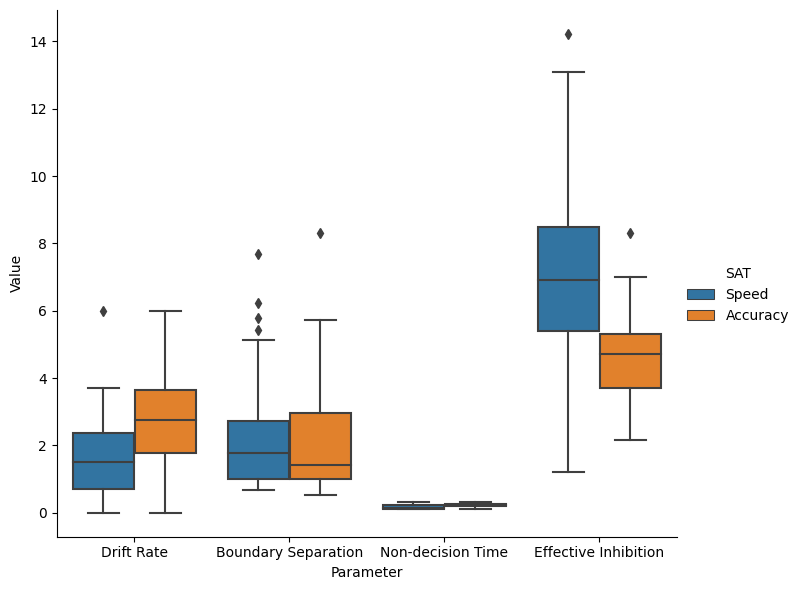

In [144]:
sns.catplot(data=df_SAT_melted, x="Parameter", y="Value", hue="SAT", kind="box",
            height=6, aspect=7/6, hue_order = ["Speed", "Accuracy"])

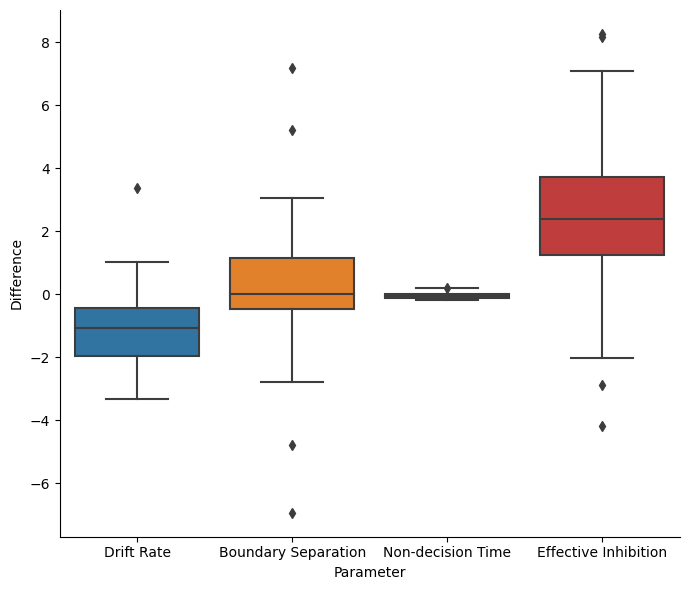

In [142]:
sns.catplot(data=df_dif_melted, x="Parameter", y="Difference", kind="box",
            height=6, aspect=7/6)

In [36]:
scipy.stats.ttest_rel(par_fitted_A[:,0], par_fitted_B[:,0])

Ttest_relResult(statistic=-4.373288847464193, pvalue=0.00012819058698248053)

In [37]:
scipy.stats.ttest_rel(par_fitted_A[:,1], par_fitted_B[:,1])

Ttest_relResult(statistic=-2.015405745154398, pvalue=0.05260255098892913)

In [38]:
scipy.stats.ttest_rel(par_fitted_A[:,2], par_fitted_B[:,2])

Ttest_relResult(statistic=-4.52779143804868, pvalue=8.272628999433037e-05)

In [39]:
scipy.stats.ttest_rel(par_fitted_A[:,3], par_fitted_B[:,3])

IndexError: index 3 is out of bounds for axis 1 with size 3

### Fit the same data with DDM

In [51]:
par_fitted_A = np.zeros((sample_size,3))
for i in range(sample_size):
    print(i)
    
    path = os.path.join(data_dir+str(i+1)+".csv")
    df = pd.read_csv(path, sep = ",")
    df = df[df["Cond"]=="speed"] # A condition
    df = df[df["Time"]<4]
    
    samp = Sample.from_pandas_dataframe(df, rt_column_name="Time", correct_column_name="Correct")

    model_fit = Model(name='Simple model (fitted)',
                  drift=DriftConstant(drift=Fittable(minval=0, maxval=6)),
                  noise=NoiseConstant(noise=1),
                  bound=BoundConstant(B=Fittable(minval=0.5, maxval=10)),
                  overlay=OverlayNonDecision(nondectime=Fittable(minval=0.1, maxval=1)),
                  dx=.001, dt=.001, T_dur=4)
                  #dx=.001, dt=.001, T_dur=3)

    fit_adjust_model(samp, model_fit,
                     fitting_method="differential_evolution",
                     lossfunction=LossRobustBIC, verbose=False)

    par_fitted_A[i,0] = np.array(model_fit.parameters()['drift']['drift'])
    par_fitted_A[i,1] = np.array(model_fit.parameters()['bound']['B'])
    par_fitted_A[i,2] = np.array(model_fit.parameters()['overlay']['nondectime'])
    
    print(par_fitted_A[i,:])


0


Info: Params [0.29981234 0.5        0.27211518] gave 89.38291053045344


[0.29981234 0.5        0.27211518]
1


Info: Params [2.09496253 0.56096491 0.33974965] gave -202.5246176725654


[2.09496253 0.56096491 0.33974965]
2


Info: Params [0.         0.86124798 0.12710588] gave 363.33358611977843


[0.         0.86124798 0.12710588]
3


Info: Params [3.90837421 0.73363527 0.31665064] gave -150.6058798184258


[3.90837421 0.73363527 0.31665064]
4


Info: Params [2.20118802 0.78788775 0.21386627] gave -58.29277190769074


[2.20118802 0.78788775 0.21386627]
5


Info: Params [1.52584055 0.59610647 0.25034656] gave -74.64500986998648


[1.52584055 0.59610647 0.25034656]
6


Info: Params [1.46830508 0.54513531 0.22426311] gave -207.28559085926463


[1.46830508 0.54513531 0.22426311]
7


Info: Params [1.45104045 0.7350121  0.15977774] gave 104.0710181050005


[1.45104045 0.7350121  0.15977774]
8


Info: Params [0.8908402  0.75254657 0.14843772] gave 213.29663654861434


[0.8908402  0.75254657 0.14843772]
9


Info: Params [0.         0.52938969 0.14256977] gave 108.34201677195003


[0.         0.52938969 0.14256977]
10


Info: Params [3.12179604 1.02779562 0.29258928] gave -43.89221819922012


[3.12179604 1.02779562 0.29258928]
11


Info: Params [2.42668582 0.54776129 0.30889727] gave -432.9003677504099


[2.42668582 0.54776129 0.30889727]
12


Info: Params [4.11611296 0.77453883 0.28151607] gave -428.7243446233081


[4.11611296 0.77453883 0.28151607]
13


Info: Params [1.56794035 0.53467861 0.23208434] gave -205.70220786125165


[1.56794035 0.53467861 0.23208434]
14


Info: Params [0.49872348 0.5005978  0.32318302] gave 125.03367358393692


[0.49872348 0.5005978  0.32318302]
15


Info: Params [2.88610938 0.6063809  0.32120838] gave -248.86939247016943


[2.88610938 0.6063809  0.32120838]
16


Info: Params [0.63941478 0.60999906 0.13910516] gave 458.718277073951


[0.63941478 0.60999906 0.13910516]
17


Info: Params [2.86257476 0.57901239 0.25681115] gave -596.5859004377165


[2.86257476 0.57901239 0.25681115]
18


Info: Params [1.71842895 0.50866637 0.2640784 ] gave -147.14228066862722


[1.71842895 0.50866637 0.2640784 ]
19


Info: Params [1.72006462 0.61032111 0.19056853] gave -256.7372892224167


[1.72006462 0.61032111 0.19056853]
20


Info: Params [0.69944275 0.5        0.20582889] gave -162.18951387926154


[0.69944275 0.5        0.20582889]
21


Info: Params [0.45101481 0.55326819 0.18284888] gave 474.4282178346599


[0.45101481 0.55326819 0.18284888]
22


Info: Params [3.243222   0.83957118 0.23297407] gave -144.1345918934836


[3.243222   0.83957118 0.23297407]
23


Info: Params [2.08203334 0.5        0.21340496] gave -655.9712567788748


[2.08203334 0.5        0.21340496]
24


Info: Params [2.27757267 0.55508363 0.24469792] gave -509.19193552611847


[2.27757267 0.55508363 0.24469792]
25


Info: Params [1.01293195 0.56044823 0.14485683] gave 7.640236840803631


[1.01293195 0.56044823 0.14485683]
26


Info: Params [6.         2.06437934 0.14297355] gave -195.68135318908247


[6.         2.06437934 0.14297355]
27


Info: Params [2.51773913 0.52203465 0.24351663] gave -455.3675174162236


[2.51773913 0.52203465 0.24351663]
28


Info: Params [3.14473603 0.5        0.28091692] gave -473.4175160062951


[3.14473603 0.5        0.28091692]
29


Info: Params [3.15170613 0.56867983 0.30634336] gave -438.8761495529578


[3.15170613 0.56867983 0.30634336]
30


Info: Params [1.59920414 0.63389661 0.20391072] gave -37.3634954474101


[1.59920414 0.63389661 0.20391072]
31


Info: Params [2.01599858 0.51032502 0.24036573] gave -622.4696735356317


[2.01599858 0.51032502 0.24036573]


In [52]:
par_fitted_B = np.zeros((sample_size,3))
for i in range(sample_size):
    print(i)
    
    path = os.path.join(data_dir+str(i+1)+".csv")
    df = pd.read_csv(path, sep = ",")
    df = df[df["Cond"]=="accuracy"] # A condition
    df = df[df["Time"]<4]
    
    samp = Sample.from_pandas_dataframe(df, rt_column_name="Time", correct_column_name="Correct")
    
    model_fit = Model(name='Simple model (fitted)',
                  drift=DriftConstant(drift=Fittable(minval=0, maxval=6)),
                  noise=NoiseConstant(noise=1),
                  bound=BoundConstant(B=Fittable(minval=0.5, maxval=10)),
                  overlay=OverlayNonDecision(nondectime=Fittable(minval=0.1, maxval=1)),
                  dx=.001, dt=.001, T_dur=4)
                  #dx=.001, dt=.001, T_dur=3)

    fit_adjust_model(samp, model_fit,
                     fitting_method="differential_evolution",
                     lossfunction=LossRobustBIC, verbose=False)

    par_fitted_B[i,0] = np.array(model_fit.parameters()['drift']['drift'])
    par_fitted_B[i,1] = np.array(model_fit.parameters()['bound']['B'])
    par_fitted_B[i,2] = np.array(model_fit.parameters()['overlay']['nondectime'])
    
    print(par_fitted_B[i,:])


0


Info: Params [0.91662207 0.6874221  0.30899603] gave 424.2986742236805


[0.91662207 0.6874221  0.30899603]
1


Info: Params [1.40228409 0.59346502 0.37437741] gave 13.065095503477139


[1.40228409 0.59346502 0.37437741]
2


Info: Params [0.         0.76360445 0.56699825] gave 282.98447314512975


[0.         0.76360445 0.56699825]
3


Info: Params [6.         1.60331462 0.25262515] gave -55.83333292315558


[6.         1.60331462 0.25262515]
4


Info: Params [2.39161843 0.80525798 0.29673408] gave -9.472499957309346


[2.39161843 0.80525798 0.29673408]
5


Info: Params [1.83669595 0.86724272 0.26420174] gave 32.02455695693537


[1.83669595 0.86724272 0.26420174]
6


Info: Params [4.35691368 0.96905441 0.36149091] gave -162.15009643765126


[4.35691368 0.96905441 0.36149091]
7


Info: Params [2.2362139  0.72250572 0.27054287] gave -108.88630063681532


[2.2362139  0.72250572 0.27054287]
8


Info: Params [1.58849298 0.67108346 0.30407538] gave 14.25120614267336


[1.58849298 0.67108346 0.30407538]
9


Info: Params [0.43258265 0.68891606 0.24815213] gave 238.91754815614365


[0.43258265 0.68891606 0.24815213]
10


Info: Params [4.25177049 1.1439029  0.35693975] gave -30.230679397184282


[4.25177049 1.1439029  0.35693975]
11


Info: Params [2.90759438 0.74786387 0.31574214] gave -200.14569831703034


[2.90759438 0.74786387 0.31574214]
12


Info: Params [3.07914851 0.63503907 0.29505093] gave -185.84464126388522


[3.07914851 0.63503907 0.29505093]
13


Info: Params [3.3651564 0.8486674 0.2894607] gave -172.0642211545467


[3.3651564 0.8486674 0.2894607]
14


Info: Params [0.12911918 0.68732971 0.31132413] gave 636.8493908052949


[0.12911918 0.68732971 0.31132413]
15


Info: Params [6.         1.22767792 0.30476451] gave -216.718588543295


[6.         1.22767792 0.30476451]
16


Info: Params [1.94852227 0.90232943 0.21791765] gave 27.691665379208814


[1.94852227 0.90232943 0.21791765]
17


Info: Params [4.10709066 0.86957659 0.24140036] gave -340.3238926596694


[4.10709066 0.86957659 0.24140036]
18


Info: Params [2.82135858 0.6293661  0.27462095] gave -177.93722193110798


[2.82135858 0.6293661  0.27462095]
19


Info: Params [3.20702991 0.73188149 0.26764832] gave -367.0685755279223


[3.20702991 0.73188149 0.26764832]
20


Info: Params [2.60471412 0.78648208 0.25580774] gave -74.2129638203156


[2.60471412 0.78648208 0.25580774]
21


Info: Params [1.28266246 0.62223857 0.31775106] gave 89.75284960304145


[1.28266246 0.62223857 0.31775106]
22


Info: Params [6.         0.98023523 0.35106449] gave -56.74354370546358


[6.         0.98023523 0.35106449]
23


Info: Params [3.41741758 0.5        0.29899713] gave -327.0369214669966


[3.41741758 0.5        0.29899713]
24


Info: Params [3.85804232 0.61579399 0.3222603 ] gave -254.91271646512314


[3.85804232 0.61579399 0.3222603 ]
25


Info: Params [2.99130597 0.62505373 0.29481485] gave -256.75116735611897


[2.99130597 0.62505373 0.29481485]
26


Info: Params [3.04951445 0.79654705 0.27129926] gave -47.24611698387588


[3.04951445 0.79654705 0.27129926]
27


Info: Params [3.77879679 0.54202734 0.28497732] gave -433.9719703936686


[3.77879679 0.54202734 0.28497732]
28


Info: Params [3.59511073 0.5        0.30397613] gave -454.6164544502151


[3.59511073 0.5        0.30397613]
29


Info: Params [2.897578   0.62220076 0.30261658] gave -318.6639778248757


[2.897578   0.62220076 0.30261658]
30


Info: Params [3.9742166  0.7823623  0.29043826] gave -211.8225069962676


[3.9742166  0.7823623  0.29043826]
31


Info: Params [4.76102095 0.86153501 0.26619146] gave -557.4280417232972


[4.76102095 0.86153501 0.26619146]


In [53]:
my_array = np.concatenate((par_fitted_A, par_fitted_B), axis = 0)
df_SAT = pd.DataFrame(my_array, columns = ['Drift Rate','Boundary Separation','Non-decision Time'])
df_SAT["SAT"] = ["Speed"]*sample_size + ["Accuracy"]*sample_size
df_SAT.to_csv("DDMresultDutilh2013.csv")

In [147]:
df_SAT = pd.read_csv(('DDMresultDutilh2013.csv'))

In [148]:
S = np.array(df_SAT.loc[(df_SAT['SAT'] == "Speed")][["Drift Rate", "Boundary Separation", "Non-decision Time"]])
A = np.array(df_SAT.loc[(df_SAT['SAT'] == "Accuracy")][["Drift Rate", "Boundary Separation", "Non-decision Time"]])
dif = S-A
df_dif = pd.DataFrame(dif,columns = ["Drift Rate", "Boundary Separation", "Non-decision Time"])

In [149]:
df_SAT_melted = pd.melt(df_SAT, id_vars = ["SAT"], value_vars=['Drift Rate', 'Boundary Separation','Non-decision Time'],
                       var_name = "Parameter", value_name = "Value")
df_dif_melted = pd.melt(df_dif, value_vars=['Drift Rate', 'Boundary Separation','Non-decision Time'],
                       var_name = "Parameter", value_name = "Difference")

In [150]:
df_dif_melted.to_csv("DDMdifResultDutilh2013.csv") 


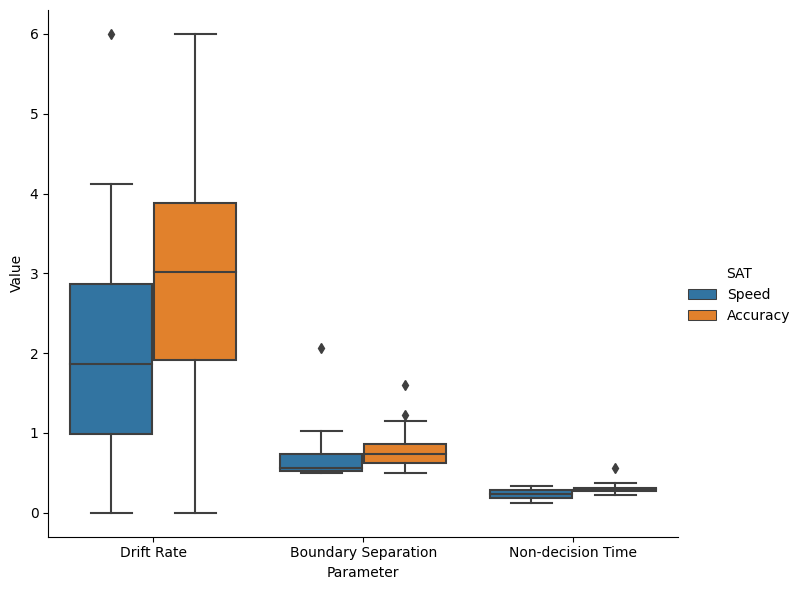

In [58]:
sns.catplot(data=df_SAT_melted, x="Parameter", y="Value", hue="SAT", kind="box",
            height=6, aspect=7/6)

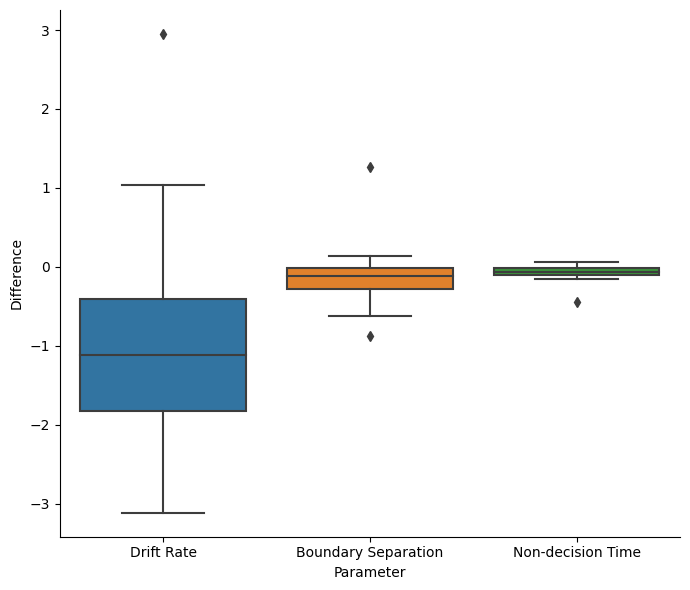

In [61]:
sns.catplot(data=df_dif_melted, x="Parameter", y="Difference", kind="box",
            height=6, aspect=7/6)

In [53]:
print(scipy.stats.ttest_rel(par_fitted_A[:,0], par_fitted_B[:,0]))
print(scipy.stats.ttest_rel(par_fitted_A[:,1], par_fitted_B[:,1]))
print(scipy.stats.ttest_rel(par_fitted_A[:,2], par_fitted_B[:,2]))
#print(scipy.stats.ttest_rel(par_fitted_A[:,3], par_fitted_B[:,3]))

Ttest_relResult(statistic=4.336639599901696, pvalue=7.818947662829324e-05)
Ttest_relResult(statistic=-5.317231618118586, pvalue=3.010032361954742e-06)
Ttest_relResult(statistic=-6.611696642074129, pvalue=3.4900999330113256e-08)
